In [1]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

--2021-08-11 03:48:40--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png’

Lenna_(test_image). 100%[===================>] 462.73K  --.-KB/s    in 0.06s   

2021-08-11 03:48:40 (7.96 MB/s) - ‘Lenna_(test_image).png’ saved [473831/473831]



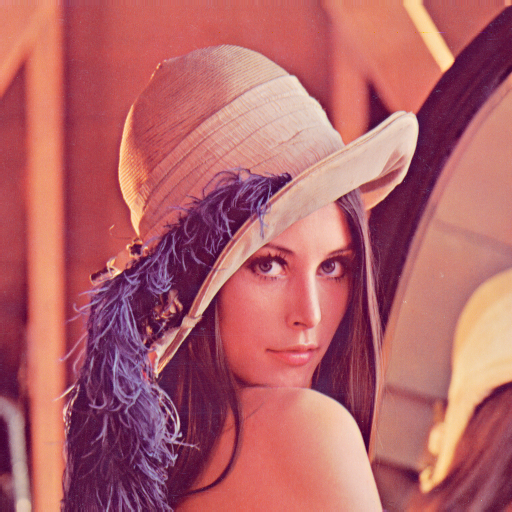

In [2]:
import cv2
img = cv2.imread("/content/Lenna_(test_image).png") 
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [3]:
print(img.shape)

(512, 512, 3)


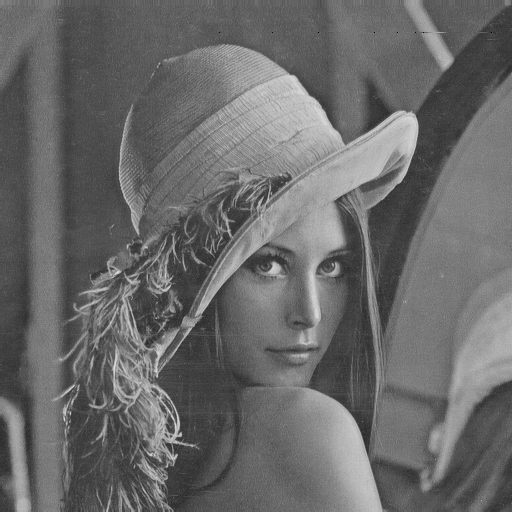

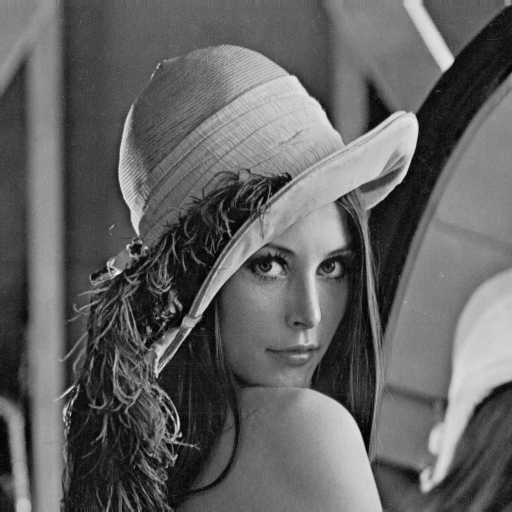

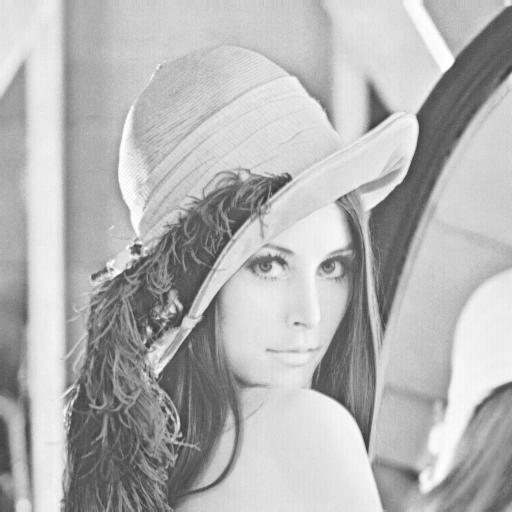

In [4]:
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

cv2_imshow(b)
cv2_imshow(g)
cv2_imshow(r)

Text(0.5, 1.0, 'Channel 1')

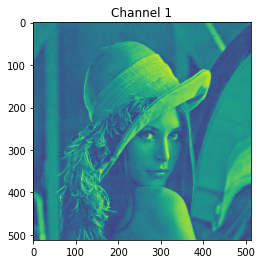

In [5]:
import matplotlib.pyplot as plt
plt.subplot(1,1,1)
plt.imshow(img[:,:,0])
plt.title('Channel 1')

In [6]:
import numpy as np
print(np.max(b), np.min(b))
print(b.shape)

225 8
(512, 512)


In [7]:
hist = []
for i in range (256):
    hist.append(0)

for i in range (512):
    for j in range (512):
        hist[b[i][j]] += 1

for i in range (256):
    print(i, hist[i])

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 7
9 0
10 0
11 0
12 1
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 3
42 2
43 7
44 14
45 24
46 46
47 67
48 108
49 137
50 254
51 347
52 483
53 626
54 785
55 1135
56 1262
57 1631
58 1756
59 2201
60 2355
61 2514
62 2767
63 2943
64 2958
65 2921
66 2876
67 2907
68 2869
69 2873
70 2899
71 3043
72 2919
73 3041
74 3107
75 3238
76 3224
77 3140
78 3218
79 3189
80 3004
81 3030
82 3078
83 3008
84 2787
85 2834
86 2960
87 2962
88 2940
89 2911
90 2949
91 3107
92 2983
93 2922
94 3045
95 3017
96 2738
97 2826
98 2700
99 2818
100 2710
101 2618
102 2559
103 2777
104 2611
105 2643
106 2597
107 2582
108 2622
109 2560
110 2538
111 2558
112 2531
113 2517
114 2660
115 2641
116 2756
117 2867
118 2872
119 3066
120 2912
121 3011
122 2813
123 2909
124 2780
125 2745
126 2527
127 2097
128 2202
129 1984
130 1854
131 1756
132 1499
133 1331
134 1237
135 1146
136 1027
137 1015
138 874
139 905

In [8]:
print(np.sum(hist) == 512*512)

True


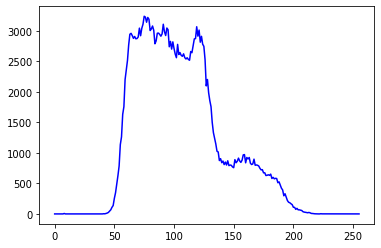

In [9]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(256)], hist, color='blue')
plt.show()

In [10]:
mask = [[0 for i in range(512)] for j in range(512)]

In [12]:
threshold = 138

for i in range(512):
    for j in range(512):
        if (b[i][j] > threshold):
            mask[i][j] = 1

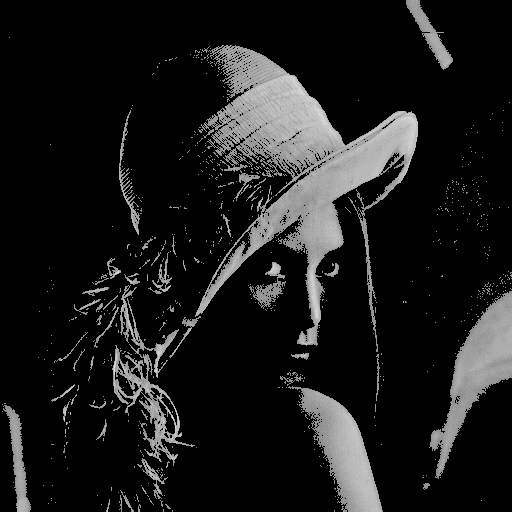

In [13]:
masked_image = b

for i in range(512):
    for j in range(512):
        if (mask[i][j] == 0):
            masked_image[i][j] = 0

cv2_imshow(masked_image)